$$
\newcommand{proof}{\textbf{Proof: }}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from module import signal

# Bandwidth


## Bandlimited signals

### Lowpass signals
A **bandlimited lowpass signal** is a signal whose:
* magnitude spectrum is concentrated around $0$ Hz.
* $|X(f)| = 0 \quad |f| > B$
    * _ie_ there is no frequency components beyond a certain frequency

We call $B$ the **bandwidth**.

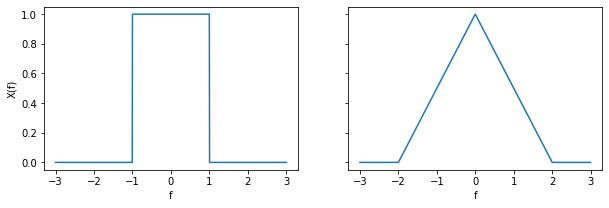

In [2]:
_, axs = plt.subplots(1, 2, figsize=(10, 3), sharey=True, sharex=True)

fs = np.linspace(-3, 3, 1000)
axs[0].plot(fs, signal.rect(fs, 2))
axs[1].plot(fs, signal.tri(fs, 2))
axs[0].set_xlabel("f")
axs[1].set_xlabel("f")
axs[0].set_ylabel("X(f)")
plt.show()

For example, the bandwidth of the above signals are $1$ and $2$ respectively (from their Fourier transform).

### Bandpass signals
A **bandlimited bandpass signal** is a signal whose:
* magnitude spectrum is concentrated around a non-zero frequency $f_c$
* $|X(f)| = 0 \quad ||f| - f_c| > B/2$

Note that it is $B/2$ instead of $B$.
The reason for this is because since real signals are symmetric, there will be 2 "humps" on opposite side of $0$ Hz.
Since the sum of the bandwidths has to be $2B$ (to be consistent with lowpass signal), each side has to have a width of $B$ instead of $B/2$

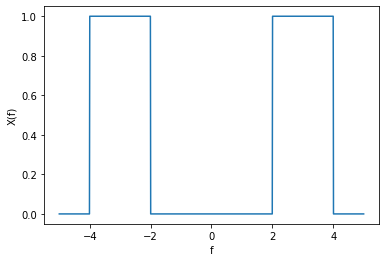

In [3]:
fs = np.linspace(-5, 5, 1000)
plt.plot(fs, signal.rect(fs - 3, 2) + signal.rect(fs + 3, 2))
plt.xlabel("f")
plt.ylabel("X(f)")
plt.show()

For example, the bandwidth of the above signal is $2$.

## Unrestricted band signals

In the physical world, many signals are not band limited, but have infinite number of frequencies.
For example, the sound of an ambient environment can consist of sound wave of unbounded high frequencies.

Deciding a bandwidth for system that is processing the signal requires some consideration:
* If the bandwidth is too small, then the signal spectrum will be truncated and will cause some signal distortion.
    * To avoid this, the bandwidth of the system must be at least the signal's bandwidth
    * However, since the bandwidth is potentially infinite, the required system bandwidth may also be infinite
* If the bandwidth is too large (or is infinite) - assuming that noise exists at all frequency levels - will cause too much noise to be introduced into the system, such that it overwhelms the signal and decrease our signal-to-noise ratio

Hence, we need to decided on some measure such that we can retain the important parts of the signal while preventing too much noise from being captured.

## Types of bandwidth

### 3dB 

The **3dB bandwidth** is defined as the frequency $f_B$ where:
$$
|X(f_B)| = \frac{|X(0)|}{\sqrt 2} \\
|X(f_B)| = \frac{|X(f_c)|}{\sqrt 2} \\
$$
for lowpass and bandpass signals respectively.

$f_B$ is the 3dB frequency based on the definition of decibels:
$$
-3dB \approx 20 \log _{10} \left( \frac{1}{\sqrt 2} \right) = 
20 \log _{10} \left( \frac{X(f_B)}{X(0)} \right)
$$

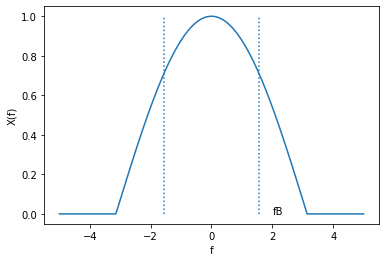

In [4]:
fs = np.linspace(-5, 5, 1000)
plt.plot(fs, np.where(np.abs(fs) > np.pi, 0, np.cos(fs / 2)))
plt.vlines(np.pi / 2, 0, 1, linestyles="dotted")
plt.text(2, 0, "fB")
plt.vlines(-np.pi / 2, 0, 1, linestyles="dotted")
plt.xlabel("f")
plt.ylabel("X(f)")
plt.show()

In the above, since $X(0) = 1$, we found $X(f_B) = |\frac{1}{\sqrt{2}}|, f_B = \frac{\pi}{2}$

### 1st-null

The **1st-null bandwidth / null-to-null** is defined as the frequency $f_B$ where $|X(f)| = 0$ and is the closest to $0$ Hz or $f_c$, for lowpass and bandpass signals respectively.

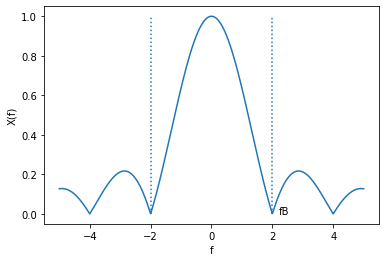

In [5]:
fs = np.linspace(-5, 5, 1000)
plt.plot(fs, np.abs(signal.sinc(fs / 2, 1)))
plt.vlines(-2, 0, 1, linestyles="dotted")
plt.text(2.2, 0, "fB")
plt.vlines(2, 0, 1, linestyles="dotted")
plt.xlabel("f")
plt.ylabel("X(f)")
plt.show()